<a href="https://colab.research.google.com/github/yazim1/Data-Science-and-Analytics-final-year-project/blob/main/final_tune_of_LSTM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This notebook contains the Python code for the Long short-term memory(LSTM) recurrent neural network(RNN) model used to predict the price of gold first tune.

#Importing the necessary Libraries

In [1]:
#import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
plt.style.use('fivethirtyeight')


In [2]:
#importing the dataset for gold from yahoo finance 'GC=F'
df = yf.download('GC=F', start='2012-01-01', end='2021-01-03')
#showing the dataset for gold
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,1568.900024,1604.300049,1566.000000,1599.699951,1599.699951,229
2012-01-04,1596.599976,1618.599976,1594.500000,1611.900024,1611.900024,172
2012-01-05,1610.800049,1624.099976,1597.800049,1619.400024,1619.400024,362
2012-01-06,1622.500000,1627.800049,1616.099976,1616.099976,1616.099976,20
2012-01-09,1614.300049,1620.099976,1607.500000,1607.500000,1607.500000,8
...,...,...,...,...,...,...
2020-12-24,1877.300049,1879.900024,1875.699951,1879.900024,1879.900024,46
2020-12-28,1895.500000,1895.800049,1873.699951,1877.199951,1877.199951,75
2020-12-29,1881.300049,1881.300049,1879.699951,1879.699951,1879.699951,343


In [3]:
#creating a new datframe extracting the adjusted close price column
data =df.filter(['Close'])
#converting the dataframe to a numpy array
dataset = data.values
#calculating the number of rows that will be our training dataset and rounding it using .ceil
training_data_len =math.ceil(len(dataset)* 0.8)
training_data_len

1810

#Data preprocessing

---
#Scaling and normalising the numpy array containing the data


In [4]:
#we have to scale the data for the nn into a rnage from 0 to 1(inclusive of 0 and 1)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data


array([[0.54851597],
       [0.56070751],
       [0.56820226],
       ...,
       [0.82832012],
       [0.83961226],
       [0.84171077]])

#Creating the training dataset

In [5]:
#Making the training dataset
train_data =scaled_data[0:training_data_len , :]
#Split the data inot x an y train sets empty sets
x_train = []
y_train = []

#for the past 60 days
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
# y train contians 61st value we want model to predict so target variable
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)


[array([0.54851597, 0.56070751, 0.56820226, 0.56490452, 0.55631056,
       0.57979412, 0.58798834, 0.59608277, 0.57919457, 0.60397715,
       0.60827419, 0.60287794, 0.6124712 , 0.62676125, 0.61297085,
       0.64854605, 0.67502751, 0.68052367, 0.67972418, 0.68651947,
       0.69581289, 0.70550618, 0.68661938, 0.67152996, 0.69511343,
       0.67802542, 0.68771858, 0.67202961, 0.67172977, 0.66463476,
       0.67502751, 0.67552716, 0.67322872, 0.7058059 , 0.7186969 ,
       0.7335865 , 0.72379331, 0.72229436, 0.73568501, 0.65863896,
       0.66983108, 0.65753975, 0.65174376, 0.62016589, 0.63205759,
       0.64684717, 0.65963826, 0.64794637, 0.64245022, 0.59128608,
       0.60787444, 0.60427699, 0.61566904, 0.59548309, 0.59878083,
       0.59108627, 0.61107228, 0.634256  , 0.63355654, 0.60667533])]
[0.6009792462160886]


In [6]:
#convert x_train and y_train to numpy arrays to train the lstm model
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshaping the data to fit into the LSTM for compatibility

In [7]:
#reshaping the x-train datset so the lstm has a 3d input at the moment its 2d lstm needs 3 dimensions.
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1750, 60, 1)

#Building the model

In [8]:
#Building the LSTM Model, 2 lstm layers and 2 dense layers 50, 50, 25 neuron respectively
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#Training the model

In [9]:
#compile the modelusing adam optimiser
model.compile(optimizer = 'RMSprop',  loss = 'mean_squared_error')

#Training the model with batch size: and epochs(number of iterations when the datstet is passed through): this takes long 1.5 minutes
model.fit(x_train, y_train, batch_size=1,epochs=5)

Epoch 1/5
1750/1750 [==============================] - 56s 30ms/step - loss: 0.0016
Epoch 2/5
1750/1750 [==============================] - 53s 30ms/step - loss: 7.0543e-04
Epoch 3/5
1750/1750 [==============================] - 57s 33ms/step - loss: 5.4511e-04
Epoch 4/5
1750/1750 [==============================] - 53s 30ms/step - loss: 4.7368e-04
Epoch 5/5
1750/1750 [==============================] - 52s 30ms/step - loss: 3.9783e-04


#Creating the test dataset to test the model

In [10]:
#creating the test dataset
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
#y is the prediction
#normal values not sclaed data
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

#converting the data to numpy array
x_test =np.array(x_test)


#Reshaping the data

In [11]:
#reshape data to 3dimensional
x_test =np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

#Make predictions on the test data

In [12]:
#'getting the predicting values' from x_test dataset
predictions = model.predict(x_test)
#unscaling the output
predictions = scaler.inverse_transform(predictions)

15/15 [==============================] - 1s 15ms/step


#Evaluate the model using performance metrics

In [13]:
#Model evaluation
rmse = np.sqrt( np.mean(predictions-y_test)**2)
rmse
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
r_squared = r2_score(y_test, predictions)
print(f'R-squared: {r_squared}')


Root Mean Squared Error (RMSE): 1.0110295388550885
Mean Squared Error (MSE): 537.3668707265658
Mean Absolute Error (MAE): 15.860279724661227
R-squared: 0.9882324942279889


#Plotting the predicted vs actual values

<ipython-input-14-e04c65de7966>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


<function matplotlib.pyplot.show(close=None, block=None)>

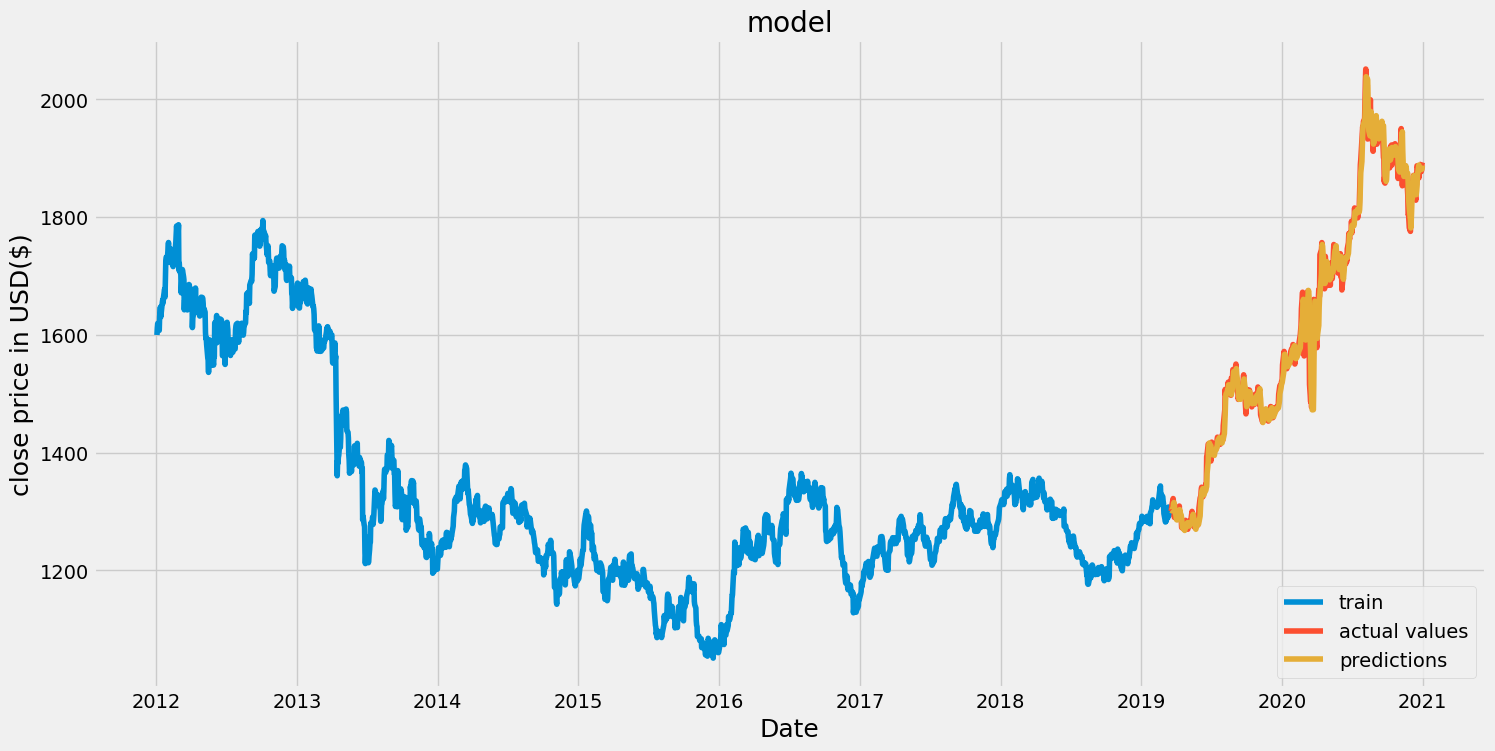

In [14]:
#plotting predicted vs actual
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize = (16,8))
plt.title('model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('close price in USD($)', fontsize =18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['train', 'actual values', 'predictions'], loc = 'lower right')
plt.show


In [15]:
#blue abve is the training data val is actual values and yellow is predicted vlaues
#the model preiccted value are below
valid

,Close,Predictions
Date,,
2019-03-20,1300.500000,1301.943237
2019-03-21,1306.099976,1301.298218
2019-03-22,1311.599976,1302.670166
2019-03-25,1321.900024,1306.252441
2019-03-26,1314.300049,1313.362671
...,...,...
2020-12-24,1879.900024,1880.001953
2020-12-28,1877.199951,1881.052856
2020-12-29,1879.699951,1881.107910


In [16]:
#comparison of actual value of gold close price and precuted for 2nd jan 2021
actual_value= yf.download('GC=F', start='2012-01-01', end='2021-01-01')
df1 = actual_value.filter(['Adj Close'])
last_60_days = df1[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
x_test = []
x_test.append(last_60_days_scaled)
#convert to numpy array
x_test = np.array(x_test)
#reshape
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
pred_price = model.predict(x_test)
#undo sclaing
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)




[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 25ms/step
[[1893.1572]]


In [17]:
yf.download('GC=F', start='2021-01-04', end='2021-01-05')

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,1912.199951,1945.099976,1912.199951,1944.699951,1944.699951,154
